ایمپورت‌های موردنیاز

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from urllib.request import urlretrieve
import numpy as np
import pandas as pd

دانلود فایل دیتاست

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
urlretrieve(url, "china_gdp.csv")
print("دانلود تکمیل شد.")

دانلود تکمیل شد.


ور رفتن با دیتاست واسه فهمیدن یسری چیز میز

In [3]:
df = pd.read_csv("china_gdp.csv")
head = df.head(3)
tail = df.tail(3)
print(head , "\n" ,tail)

   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10 
     Year         Value
52  2012  8.461623e+12
53  2013  9.490603e+12
54  2014  1.035483e+13


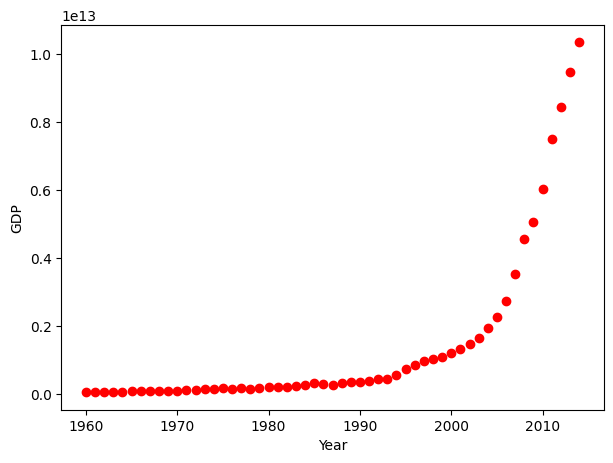

In [4]:
plt.figure(figsize=(7,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

تعریف کردن تابعی که بجای توابع آماده خودمون نوشتیمش

In [5]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

نرمال سازی داده‌ها

In [6]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

فراخوانی تابع "کرو فیت" واسه پیدا کردن بتاهای مناسب تابع خودمون

In [19]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print("beta_1 = " ,popt[0])
print("beta_2 = ", popt[1])
print("covariences are = ", pcov)

beta_1 =  690.4517105515218
beta_2 =  0.9972071272529957
covariences are =  [[ 1.52271496e+03 -2.88118967e-04]
 [-2.88118967e-04  7.25961451e-09]]


کشیدن نمودار اصلی و مقایسه با نمودار ساخته شده از روی تابع ما

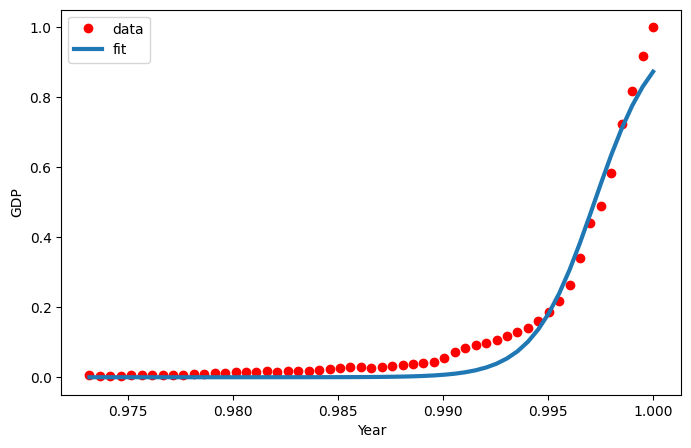

In [20]:
plt.figure(figsize=(8,5))
x = xdata
y = sigmoid(x, popt[0], popt[1])
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

ارزیابی دقت مدل

In [21]:
from sklearn.metrics import r2_score
msk = np.random.rand(len(df)) < 0.8

train_x = xdata[msk]
test_x = xdata[~msk]

train_y = ydata[msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

per_y = sigmoid (test_x, *popt)

print("R2-score: %.2f" % r2_score(per_y , test_y ) )

R2-score: 0.98


پیش بینی کردن "جی دی پی" در هر سالی

In [25]:
year = int(input('لطفا سال مورد نظر را وارد کنید: '))
max_year = max(df["Year"].values)
normalized_year = year / max_year

predicted_gdp_normalized = sigmoid(normalized_year, *popt)
max_gdp = max(df["Value"].values)
pre_x = predicted_gdp_normalized * max_gdp

print (pre_x)

لطفا سال مورد نظر را وارد کنید:  2015


9412547005400.002
